In [1]:
from google.colab import drive
import os

drive.mount('/content/drive',force_remount=True)
dataset_dir = '/content/drive/MyDrive/Greenland'

Mounted at /content/drive


In [2]:
os.chdir(dataset_dir)
!ls

Capstone_low_height_point660_processed
Capstone_medium_height_point660_processed
Capstone_top_height_point660_processed


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def ingest_image(file):
  """Ingests an image file and converts it to a usable format.
  Args: file: The file name/path of the image to process.
  Returns: A NumPy array representing the image.
  """
  image = cv2.imread(file)
  # Converting the image to a NumPy array
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image


def plot_image(image, title="Image"):
  """Plots an image.
  Args: image: NumPy array representing the image.
        title: The title of the plot.
  """
  plt.figure()
  plt.imshow(image)
  plt.title(title)
  plt.show()

def get_image_statistics(image):
  """Calculates the mean, median, and standard deviation of an image.
  Args: image: A NumPy array representing the image.
  Returns: Statistics : A tuple containing the mean, median, and standard deviation of the image.
  """
  mean = np.mean(image)
  median = np.median(image)
  std = np.std(image)
  return round(mean,2), round(median,2), round(std,2)

def process_images_in_folder(folder_path):
    """Processes all the images in the specified folder.
    Args: folder_path: Path to the folder containing the images.
    """
    # List of all files with jpg for now
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]

    for file in image_files:
        file_path = os.path.join(folder_path, file)
        image = ingest_image(file_path)
        image_name = os.path.splitext(file)[0]
        plot_image(image, title=image_name)
        image_statistics = get_image_statistics(image)
        print(f"Image reference id: {image_name}\nMean: {image_statistics[0]}\nMedian: {image_statistics[1]}\nStandard deviation: {image_statistics[2]}\n{'='*30}")
        break
# if __name__ == "__main__":
#     folder_path = os.path.join(dataset_dir, 'Capstone_low_height_point660_processed/Processed/1_initial/project_data/normalised')
#     process_images_in_folder(folder_path)

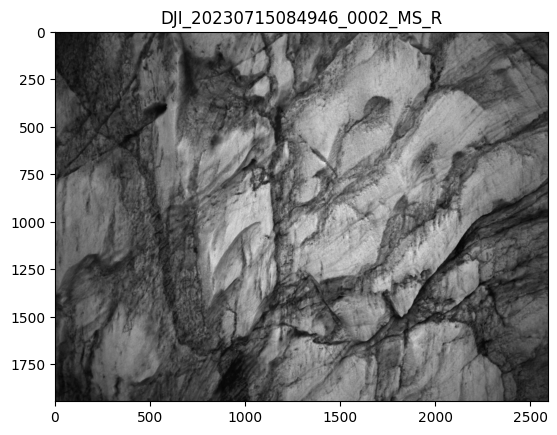

Image reference id: DJI_20230715084946_0002_MS_R
Mean: 100.65
Median: 97.0
Standard deviation: 45.49


In [4]:
folder_path_low = os.path.join(dataset_dir, 'Capstone_low_height_point660_processed/Processed/1_initial/project_data/normalised')
process_images_in_folder(folder_path_low)

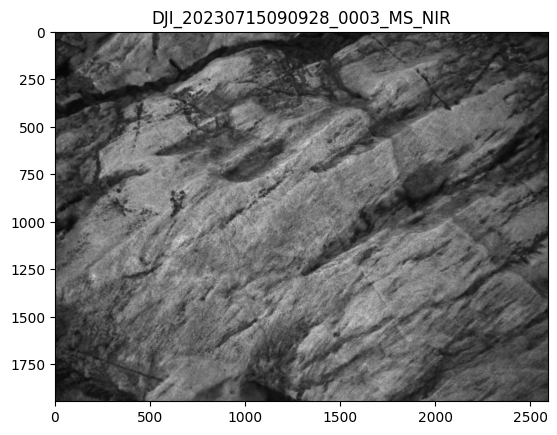

Image reference id: DJI_20230715090928_0003_MS_NIR
Mean: 94.19
Median: 95.0
Standard deviation: 38.15


In [5]:
folder_path_medium = os.path.join(dataset_dir, 'Capstone_medium_height_point660_processed/Processed/1_initial/project_data/normalised')
process_images_in_folder(folder_path_medium)

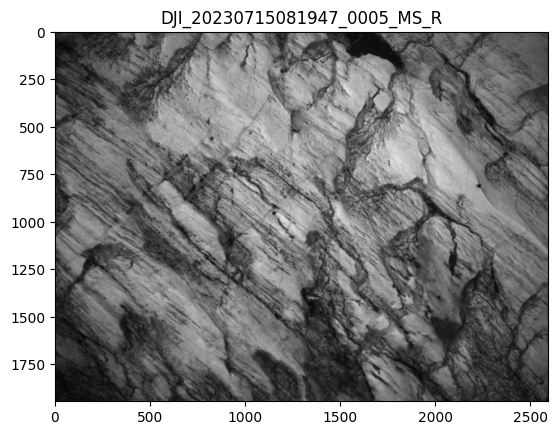

Image reference id: DJI_20230715081947_0005_MS_R
Mean: 104.28
Median: 104.0
Standard deviation: 45.97


In [6]:
folder_path_high = os.path.join(dataset_dir, 'Capstone_top_height_point660_processed/Processed/1_initial/project_data/normalised')
process_images_in_folder(folder_path_high)